In [80]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
import sys
sys.path.append('/home/xhding/workspaces/torch-deep-retina')
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
import torch
import h5py
from  torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
from scipy.stats import pearsonr
from scipy.special import factorial
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from fnn.evaluation import *
from fnn.utils import select_model
from fnn.config import get_custom_cfg
from fnn.data import TestDataset, ValidationDataset
from fnn.distributions import *
from fnn.notebook.utils import *
from torchdeepretina.datas import loadexpt
from torchdeepretina.pyret_func import estfr

In [3]:
file_path = '/home/xhding/tem_stim/21-03-15/naturalscene.h5'
cells = [0,1,2,3,4,6]
t_list = [3,3,3,3,2,3]
recording = recording_stats(file_path, cells)
recording_cut = recording_stats(file_path, cells, truncate=True, t_list=t_list)
single_trial_bin = recording.single_trial_bin
single_trial_bin_cut = recording_cut.single_trial_bin

In [4]:
device = torch.device('cuda:6')
cfg = get_custom_cfg('bn_cnn_stack_try')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/BN_CNN_Stack/epoch_070_loss_-3.54_pearson_0.6845.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
test_data = DataLoader(TestDataset(cfg), batch_size=500)
test_pc, pred, targ = pearsonr_batch_eval(model, test_data, 6, device, cfg)

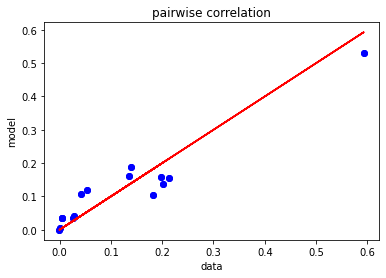

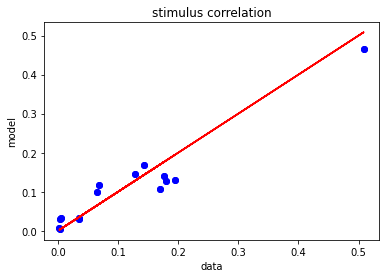

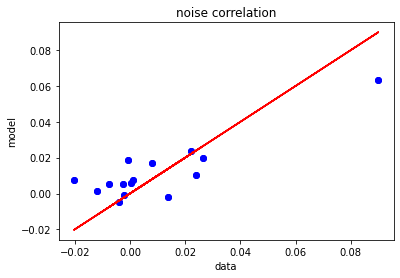

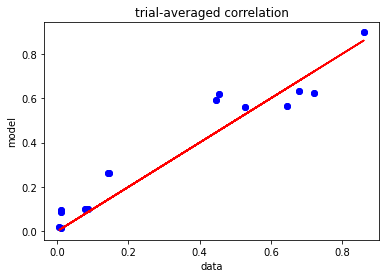

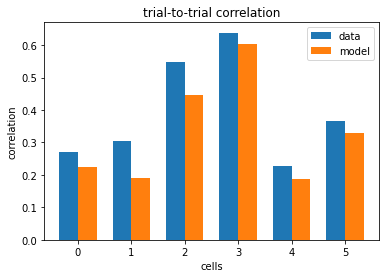

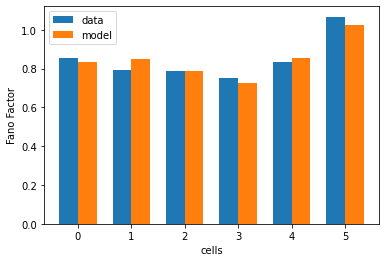

In [6]:
binomial_para = [2.17, 3.1, 2.7, 2.5, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0, 0, 0.5, 0])
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=100)

min_error = 10
for i in range(100):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

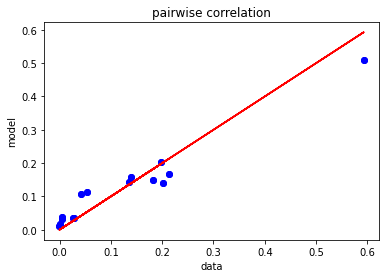

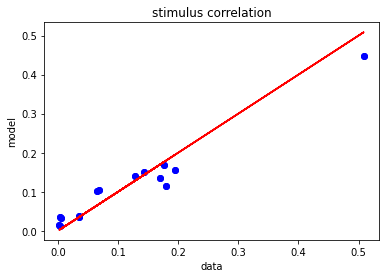

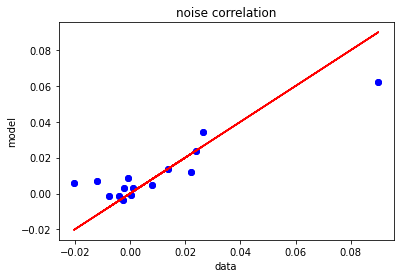

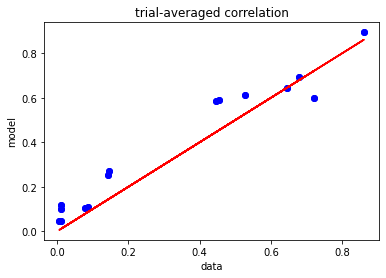

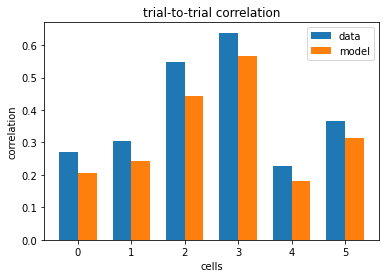

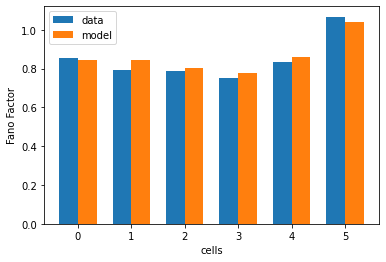

In [7]:
binomial_para = [2.17, 2.85, 2.5, 2.5, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0, 0, 0.5, 0])
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=100)

min_error = 10
for i in range(100):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

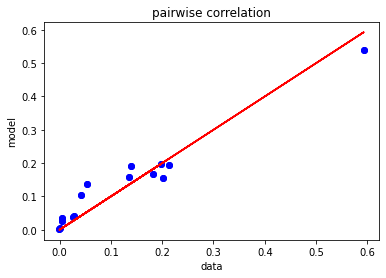

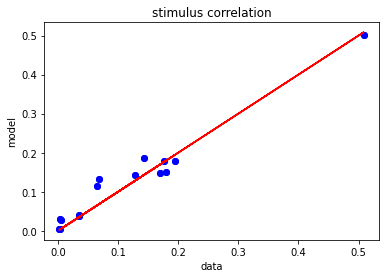

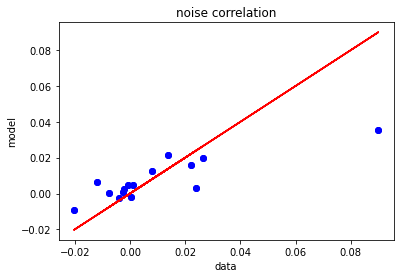

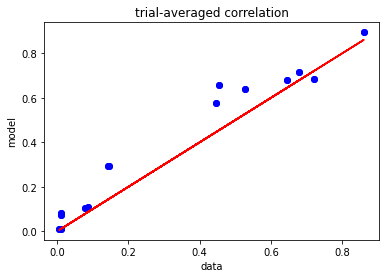

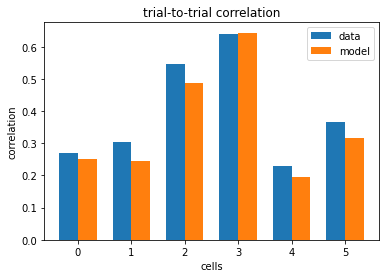

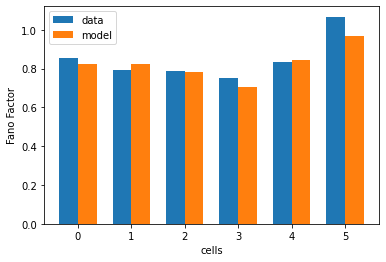

In [13]:
binomial_para = [2.17, 2.85, 2.5, 2.5, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.3, 0])
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=100)

min_error = 10
for i in range(100):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

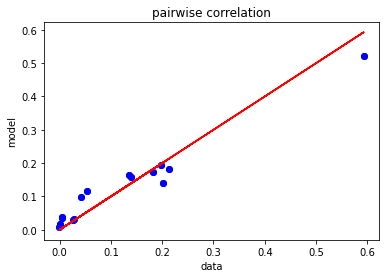

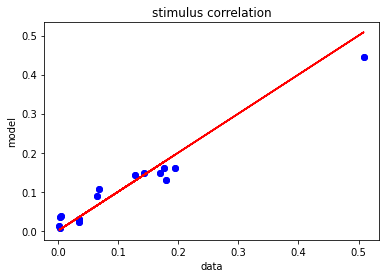

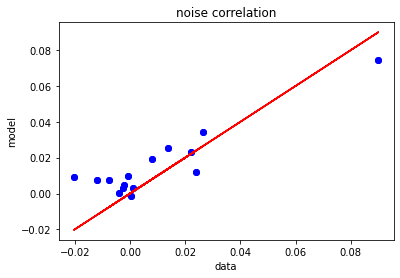

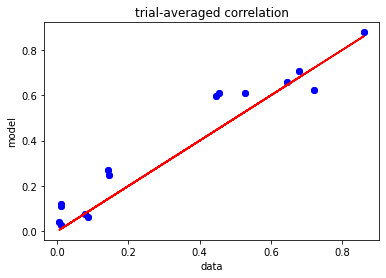

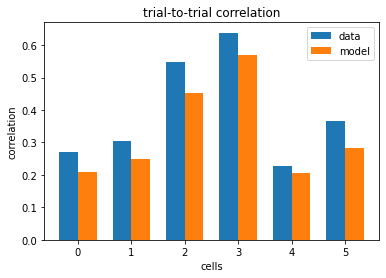

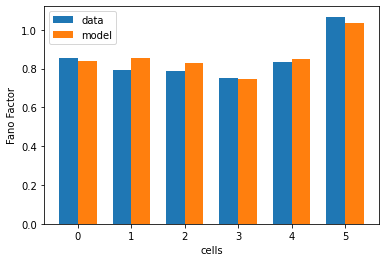

In [18]:
binomial_para = [2.17, 2.85, 2.5, 2.5, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.5, 0])
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=100)

min_error = 10
for i in range(100):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

In [93]:
g2_errors = []
g1_errors = []
g0_errors = []


for g2 in np.linspace(0.3, 1.,71):
    binomial_para = [2.17, 2.85, 1.91, 1.69, 1.0, 0.47]
    error_stats_post = []
    pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0, 0, g2, 0])
    poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
    pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=100, thre=15)
    
    min_error = 10
    
    for i in range(100):
        pred_single_trial = pred_single_trial_multi[i]
        error = error_corr2(single_trial_bin, pred_single_trial)
        if error < min_error:
            min_error = error
    g2_errors.append((g2, min_error))

for g1 in np.linspace(0., 0.8, 81):
    binomial_para = [2.17, 2.85, 1.91, 1.69, 1.0, 0.47]
    error_stats_post = []
    pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0, g1, 0, 0])
    poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
    pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=100, thre=15)
    
    min_error = 10
    
    for i in range(100):
        pred_single_trial = pred_single_trial_multi[i]
        error = error_corr2(single_trial_bin, pred_single_trial)
        if error < min_error:
            min_error = error
    g1_errors.append((g1, min_error))

for g0 in np.linspace(0, 5, 51):
    binomial_para = [2.17, 2.85, 1.91, 1.69, 1.0, 0.47]
    error_stats_post = []
    pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [g0, 0, 0, 0])
    poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
    pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=100, thre=15)
    
    min_error = 10
    
    for i in range(100):
        pred_single_trial = pred_single_trial_multi[i]
        error = error_corr2(single_trial_bin, pred_single_trial)
        if error < min_error:
            min_error = error
    g0_errors.append((g0, min_error))

In [106]:
np.array(g2_errors)[64]

array([0.94      , 0.00179082])

In [110]:
np.array(g2_errors)[51]

array([0.81      , 0.00202467])

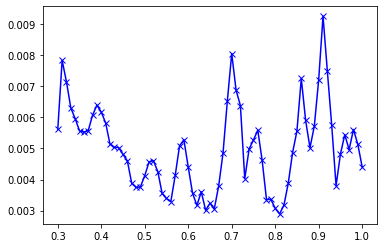

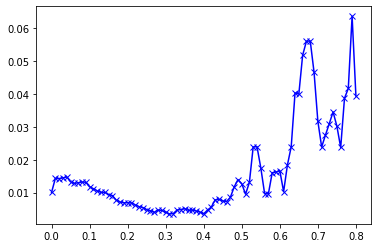

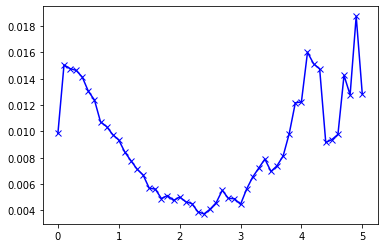

In [100]:
errors = np.convolve(np.array(g2_errors)[:, 1], np.ones(3)/3, mode='same')
plt.plot(np.array(g2_errors)[:, 0], errors, 'bx-')
plt.show()
errors = np.convolve(np.array(g1_errors)[:, 1], np.ones(3)/3, mode='same')
plt.plot(np.array(g1_errors)[:, 0], errors, 'bx-')
plt.show()
errors = np.convolve(np.array(g0_errors)[:, 1], np.ones(3)/3, mode='same')
plt.plot(np.array(g0_errors)[:, 0], errors, 'bx-')
plt.show()

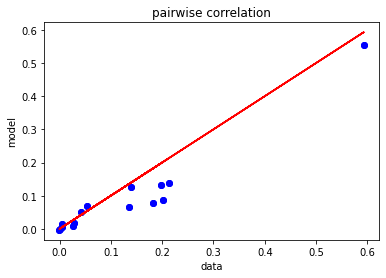

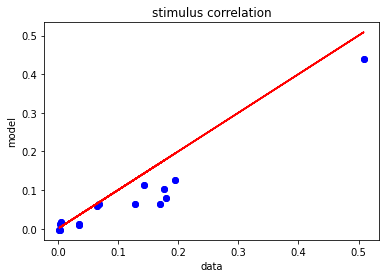

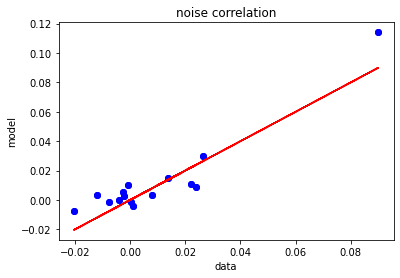

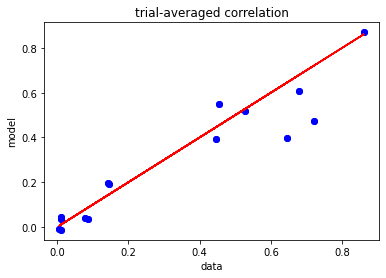

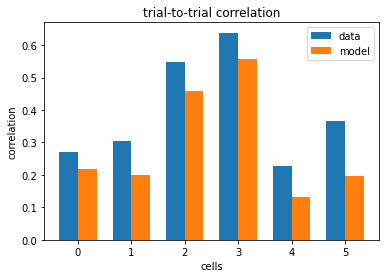

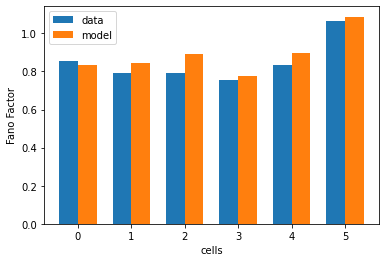

In [113]:
binomial_para = [2.17, 2.85, 1.91, 1.69, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.81, 0], 27)
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=27, thre=15)

min_error = 10
for i in range(300):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

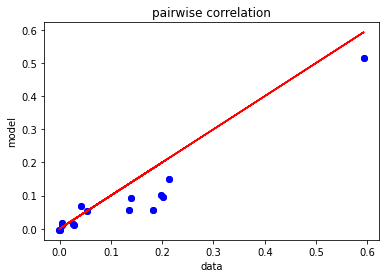

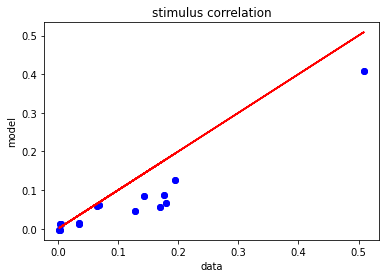

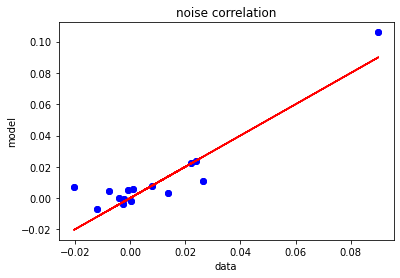

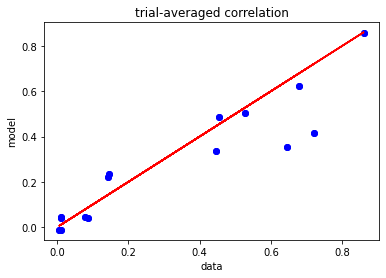

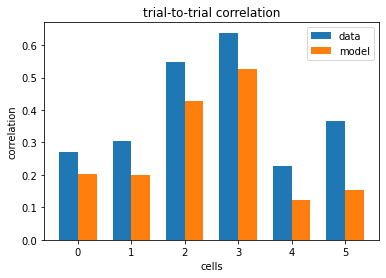

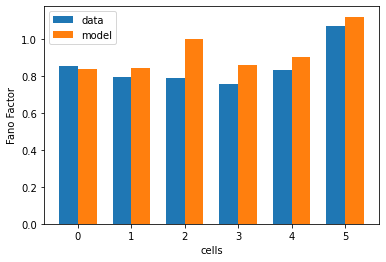

In [114]:
binomial_para = [2.17, 2.85, 1.91, 1.69, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.94, 0], 27)
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=27, thre=15)

min_error = 10
for i in range(300):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

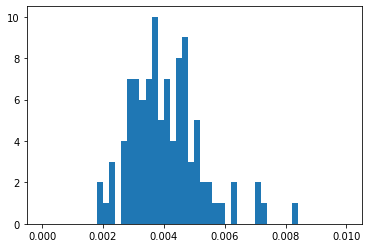

In [116]:
error_stats_draw_stats = []
for seed in range(100):
    binomial_para = [2.17, 2.85, 1.91, 1.69, 1.0, 0.47]
    error_stats_post = []
    pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0., 0.55, 0], seed)
    poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
    pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=100, seed=seed, thre=15)
    
    min_error = 10
    
    for i in range(100):
        pred_single_trial = pred_single_trial_multi[i]
        error = error_corr2(single_trial_bin, pred_single_trial)
        if error < min_error:
            min_error = error
    error_stats_draw_stats.append((seed, min_error))
    
plt.hist(np.array(error_stats_draw_stats)[:,1], bins=50, range=(0.,0.01))
plt.show()

In [117]:
np.where(np.array(error_stats_draw_stats)[:,1]==np.array(error_stats_draw_stats)[:,1].min())

(array([55]),)

In [118]:
mean,std=norm.fit(np.array(error_stats_draw_stats)[:,1])
mean, std

(0.004061292140813858, 0.0011622873566243409)

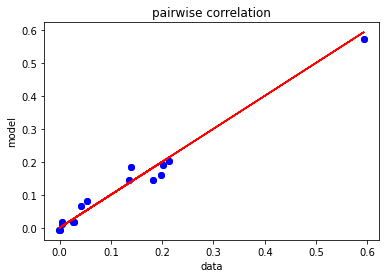

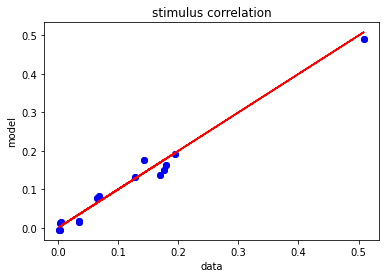

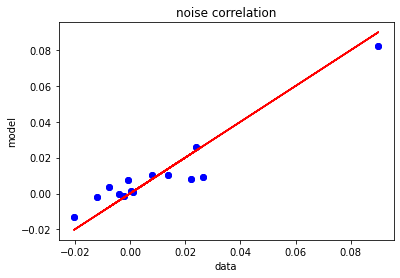

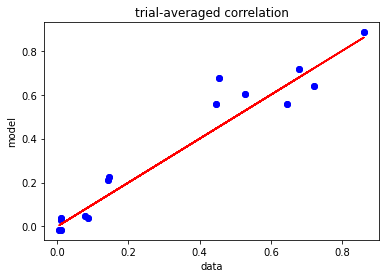

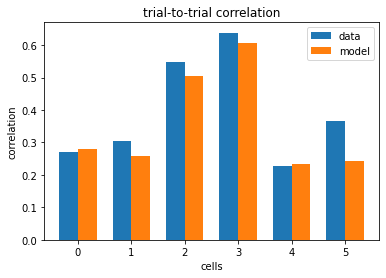

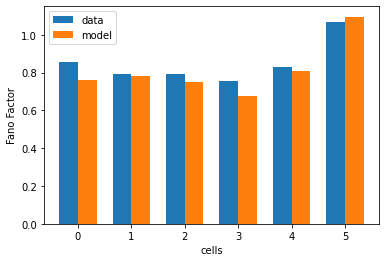

In [120]:
binomial_para = [2.17, 2.85, 1.91, 1.69, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.55, 0], 55)
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=100, seed=55, thre=15)

min_error = 10
for i in range(100):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

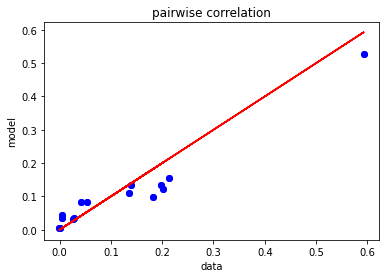

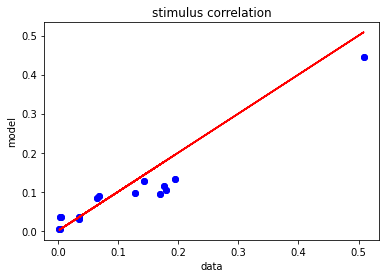

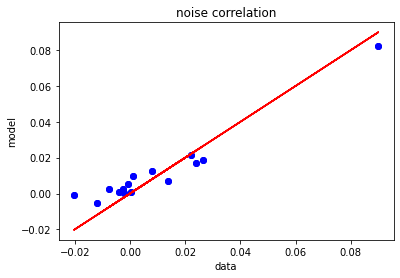

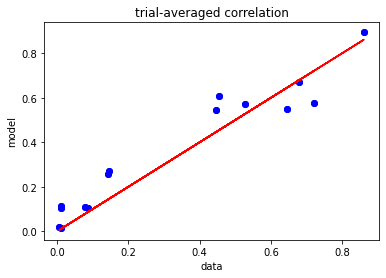

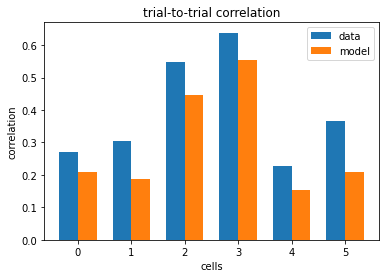

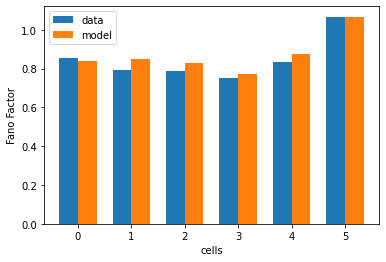

In [36]:
binomial_para = [2.17, 2.85, 2.5, 2.5, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.55, 0], 27)
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=27)

min_error = 10
for i in range(300):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

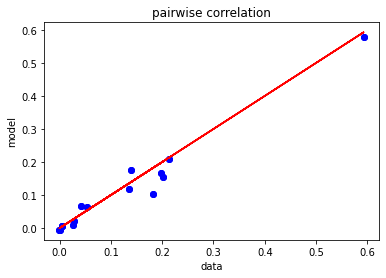

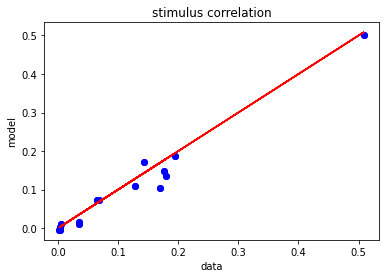

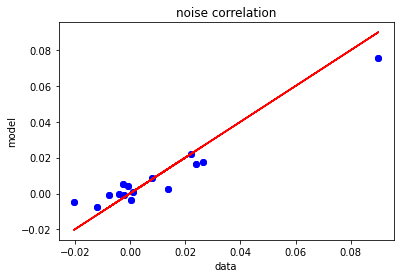

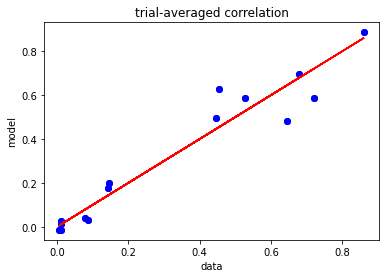

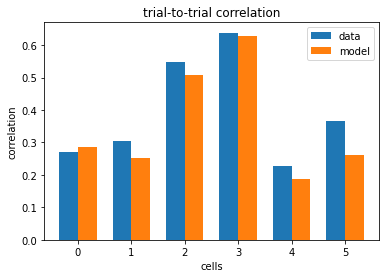

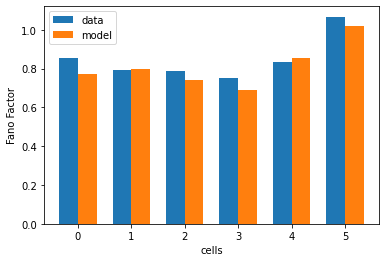

In [79]:
binomial_para = [2.17, 2.85, 1.91, 1.69, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.55, 0], 27)
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=27, thre=15)

min_error = 10
for i in range(300):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

In [82]:
for thre in range(10, 21):
    binomial_para = [2.17, 2.85, 1.91, 1.69, 1.0, 0.47]
    error_stats_post = []
    pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.55, 0], 27)
    poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
    pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=27, thre=thre)

    min_error = 10
    for i in range(300):
        pred_single_trial = pred_single_trial_multi[i]
        error = error_corr2(single_trial_bin, pred_single_trial)
        if error < min_error:
            min_error = error
            pred_single_trial_try = pred_single_trial

    print(thre, variability_error(single_trial_bin, pred_single_trial_try))

10 1.233531690133716
11 1.209755382812555
12 1.182989546302337
13 1.1555708852001905
14 1.1419368455293988
15 1.121749822271184
16 1.138873597699869
17 1.2373639233212748
18 1.2745968815703637
19 1.1499939560568486
20 1.2654700822252476


pred_single_trial[:, :, pred_scale.mean(0)<thre, cell] = 0

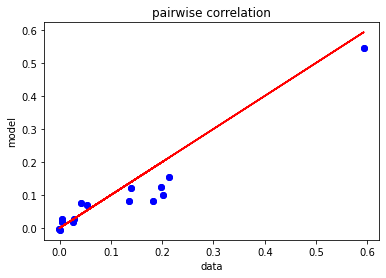

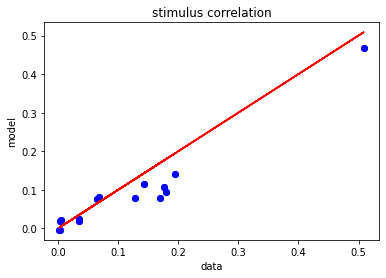

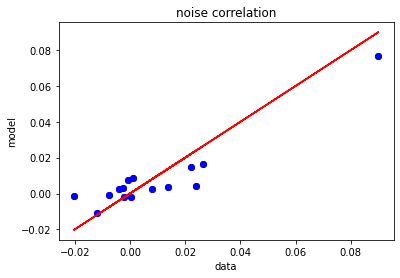

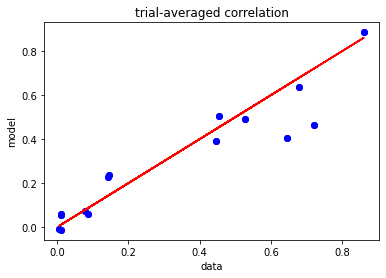

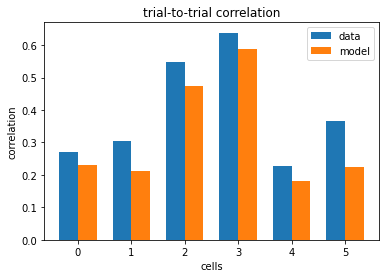

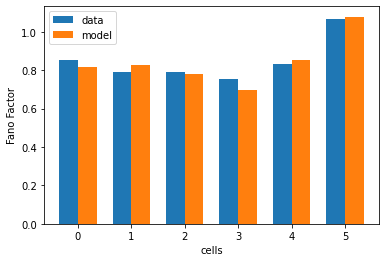

In [69]:
binomial_para = [2.17, 2.85, 2.3, 2.3, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.55, 0], 27)
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=27, thre=10)

min_error = 10
for i in range(300):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

pred_single_trial[:, :, pred_single_trial.mean((0,1))<thre/100] = 0

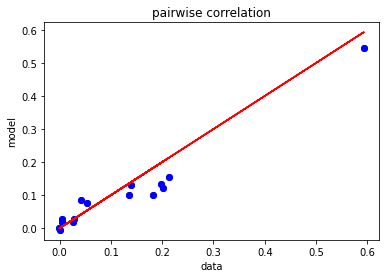

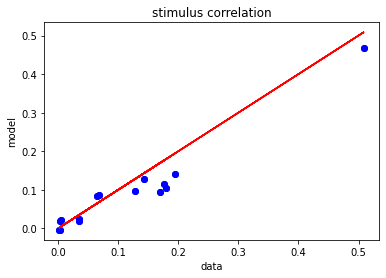

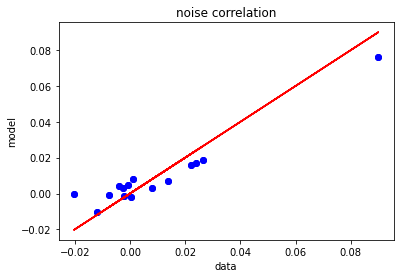

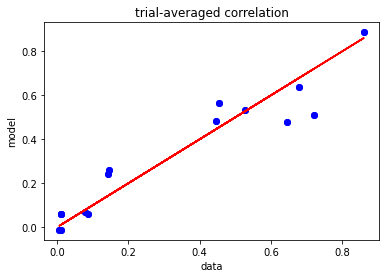

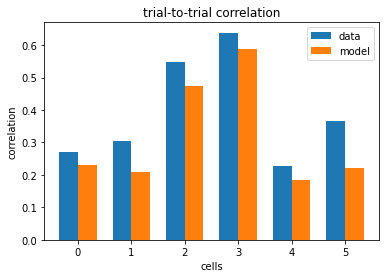

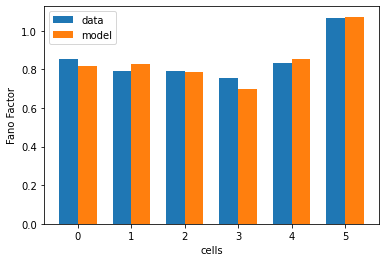

In [70]:
binomial_para = [2.17, 2.85, 2.3, 2.3, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.55, 0], 27)
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=27, thre=10)

min_error = 10
for i in range(300):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

pred_single_trial[:, :, pred<thre] = 0

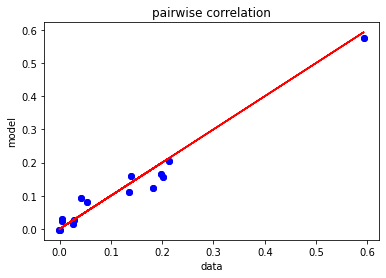

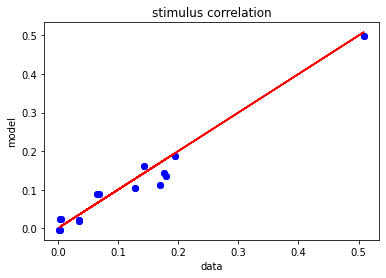

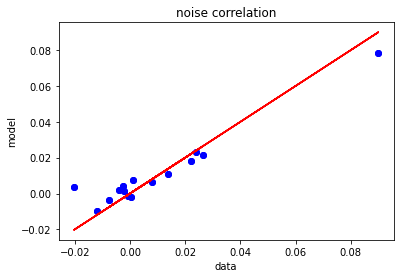

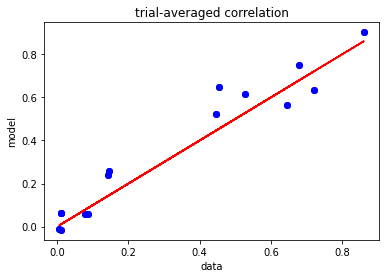

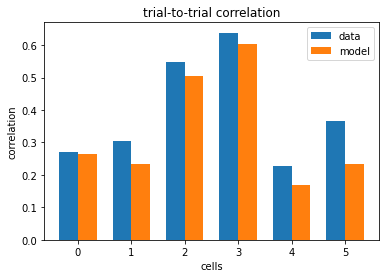

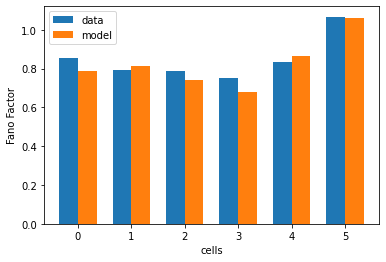

In [71]:
binomial_para = [2.17, 2.85, 2.3, 2.3, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.55, 0], 27)
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=300, seed=27, thre=10)

min_error = 10
for i in range(300):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

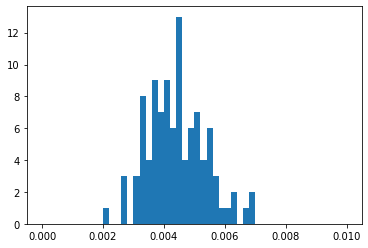

In [25]:
error_stats_draw_stats = []
for seed in range(100):
    binomial_para = [2.17, 2.85, 2.5, 2.5, 1.0, 0.47]
    error_stats_post = []
    pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0., 0.5, 0], seed)
    poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
    pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=100, seed=seed)
    
    min_error = 10
    
    for i in range(100):
        pred_single_trial = pred_single_trial_multi[i]
        error = error_corr2(single_trial_bin, pred_single_trial)
        if error < min_error:
            min_error = error
    error_stats_draw_stats.append((seed, min_error))
    
plt.hist(np.array(error_stats_draw_stats)[:,1], bins=50, range=(0.,0.01))
plt.show()

In [29]:
from scipy.stats import norm
mean,std=norm.fit(np.array(error_stats_draw_stats)[:,1])
mean, std

(0.0044212613931525315, 0.0009377479639470971)

In [27]:
np.where(np.array(error_stats_draw_stats)[:,1]==np.array(error_stats_draw_stats)[:,1].min())

(array([87]),)

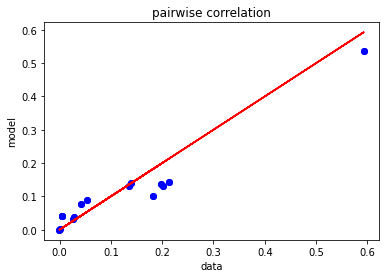

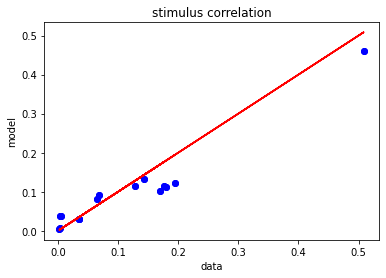

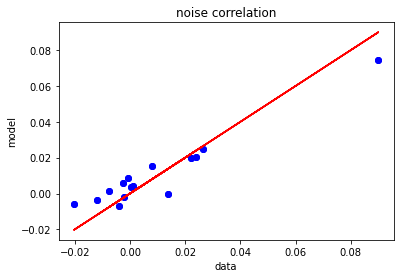

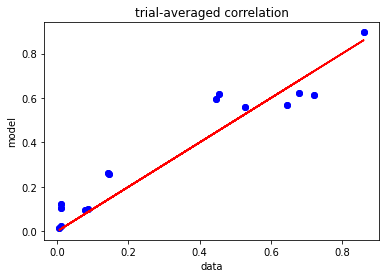

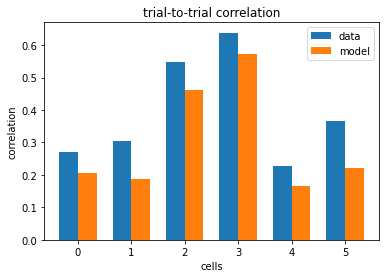

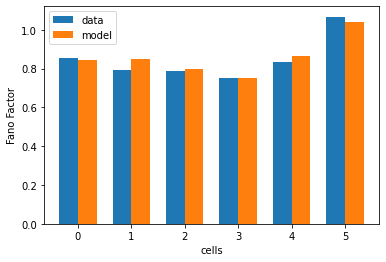

In [28]:
binomial_para = [2.17, 2.85, 2.5, 2.5, 1.0, 0.47]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.5, 0], 87)
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=100, seed=87)

min_error = 10
for i in range(100):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

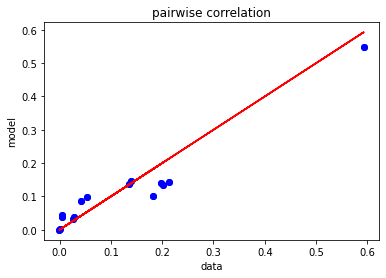

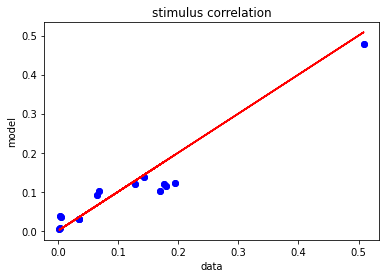

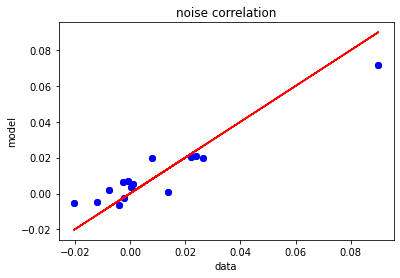

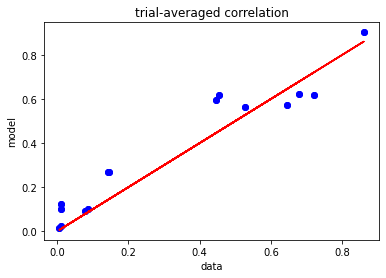

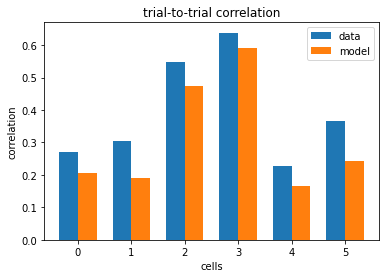

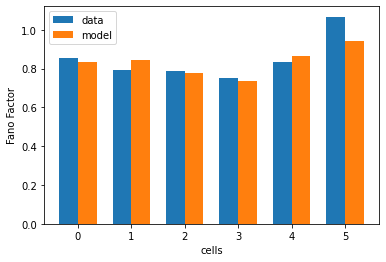

In [32]:
binomial_para = [3.57, 4.25, 4., 4., 1.0, 1.]
error_stats_post = []
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, 15, [0., 0, 0.5, 0], 87)
poly_paras = poly_para_fit(recording, pred_single_trial_pre, t_list)
pred_single_trial_multi = model_single_trial_post_multi(pred_single_trial_pre, binomial_para, t_list, poly_paras, pred, n_repeats=100, seed=87)

min_error = 10
for i in range(100):
    pred_single_trial = pred_single_trial_multi[i]
    error = error_corr2(single_trial_bin, pred_single_trial)
    if error < min_error:
        min_error = error
        pred_single_trial_try = pred_single_trial
        
correlation_plot_2(single_trial_bin, pred_single_trial_try)

In [121]:
cmap = pl.cm.hot
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:,-1] = np.linspace(1, 0, cmap.N)
my_cmap = ListedColormap(my_cmap)

g0s = []
g1s = []
g2s = []
errors =[]
f = open('./errors3.txt', 'r')
for line in f.readlines():
    g0 = round(float(line.split()[0][1:-1]), 3)
    g1 = round(float(line.split()[1][:-1]), 3)
    g2 = round(float(line.split()[2][:-1]), 3)
    error = float(line.split()[3])
    g0s.append(g0)
    g1s.append(g1)
    g2s.append(g2)
    errors.append(error)
g0s = np.array(g0s)/0.759
g1s = np.array(g1s)/0.0759
g2s = np.array(g2s)/0.0870
errors = np.array(errors)

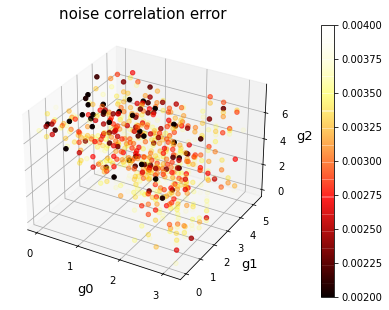

In [123]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(projection='3d')
p = ax.scatter(g0s, g1s, g2s, c=errors, marker='o', cmap=my_cmap, vmax=0.004, vmin=0.002, depthshade=False)
ax.set_xlabel('g0', fontsize=13)
ax.set_ylabel('g1', fontsize=13)
ax.set_zlabel('g2', fontsize=13)
ax.set_title('noise correlation error', fontsize=15)
fig.colorbar(p, ax=ax)
plt.locator_params(nbins=6)
plt.show()

In [102]:
g0_range = np.linspace(0.,2.4, 11)
g1_range = np.linspace(0.,0.4, 11)
g2_range = np.linspace(0.,0.66, 11)
print(g0_range, g1_range, g2_range)

[0.   0.24 0.48 0.72 0.96 1.2  1.44 1.68 1.92 2.16 2.4 ] [0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4 ] [0.    0.066 0.132 0.198 0.264 0.33  0.396 0.462 0.528 0.594 0.66 ]


In [101]:
g0_range = np.linspace(0.08,2.24, 10)
g1_range = np.linspace(0.013,0.373, 10)
g2_range = np.linspace(0.022,0.616, 10)
print(g0_range, g1_range, g2_range)

[0.08 0.32 0.56 0.8  1.04 1.28 1.52 1.76 2.   2.24] [0.013 0.053 0.093 0.133 0.173 0.213 0.253 0.293 0.333 0.373] [0.022 0.088 0.154 0.22  0.286 0.352 0.418 0.484 0.55  0.616]


In [103]:
g0_range = np.linspace(0.16,2.32, 10)
g1_range = np.linspace(0.027,0.387, 10)
g2_range = np.linspace(0.044,0.638, 10)
print(g0_range, g1_range, g2_range)

[0.16 0.4  0.64 0.88 1.12 1.36 1.6  1.84 2.08 2.32] [0.027 0.067 0.107 0.147 0.187 0.227 0.267 0.307 0.347 0.387] [0.044 0.11  0.176 0.242 0.308 0.374 0.44  0.506 0.572 0.638]
